# Gravitational Wave Luminosity (Power Radiated) using Numerical Differentiation

Gravitational waves do carry energy away from a system. The energy flux (power per unit area) in gravitational radiation is proportional to the square of the time derivatives of the strain.

### 1. Using NR Simulated data

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
hdata = h5py.File('/mnt/pfs/bhuvaneshwari.kashi/Visualizations/Clm/rhOverM_Extrapolated_N6_CoM.h5'
)

In [3]:
h_data = hdata[f'Y_l{2}_m{2}.dat'][...]

In [4]:
arr_hplus = [a[1] for a in h_data]
arr_hcross = [a[2] for a in h_data]
arr_t = [a[0] for a in h_data]

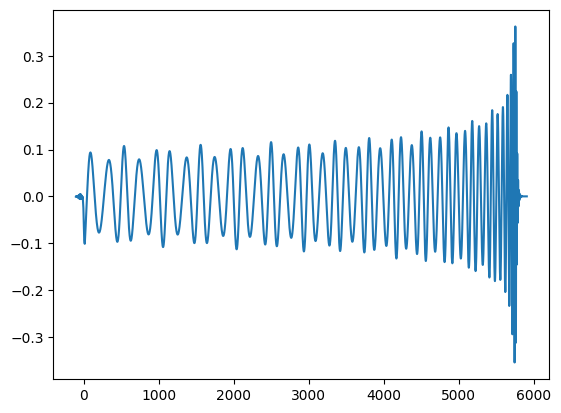

In [5]:
plt.plot(arr_t,arr_hplus)

In [6]:
np.shape(arr_hplus)

(17044,)

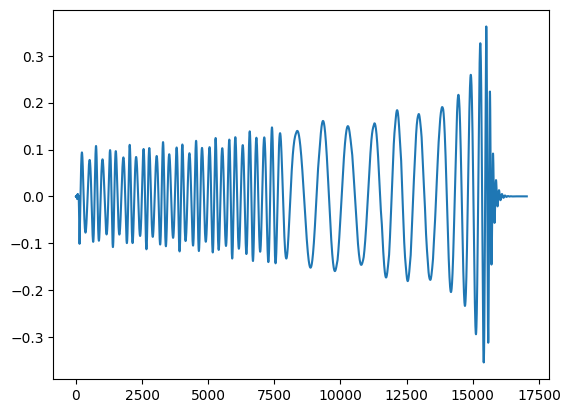

In [7]:
plt.plot(arr_hplus)

In [8]:
dt = arr_t[1] - arr_t[0]
dt

0.85306887062778

In [9]:
dhplus_dt = np.gradient(arr_hplus, dt)
dhplus_dt

array([-2.31429570e-04, -1.73344455e-04, -3.45009042e-06, ...,
       -7.03410584e-08, -6.58454713e-08, -6.35622545e-08])

In [10]:
dhpsq = np.square(dhplus_dt)
dhpsq

array([5.35596458e-08, 3.00482999e-08, 1.19031239e-11, ...,
       4.94786449e-15, 4.33562609e-15, 4.04016020e-15])

In [11]:
dhcross_dt = np.gradient(arr_hcross, dt)
dhcross_dt

array([-1.54418843e-04, -2.47690362e-04, -3.07772103e-04, ...,
        4.02089236e-08,  4.26232488e-08,  4.37345797e-08])

In [12]:
dhcsq = np.square(dhcross_dt)
dhcsq

array([2.38451789e-08, 6.13505154e-08, 9.47236673e-08, ...,
       1.61675753e-15, 1.81674134e-15, 1.91271347e-15])

In [13]:
dhsqtot = np.add(dhpsq,dhcsq)
dhsqtot

array([7.74048247e-08, 9.13988153e-08, 9.47355704e-08, ...,
       6.56462202e-15, 6.15236743e-15, 5.95287367e-15])

In [14]:
# Energy flux constant
const = 8.035e33

In [15]:
# GW luminosity or power radiated (up to a constant factor)
L = const * dhsqtot
L

array([6.21947766e+26, 7.34389481e+26, 7.61200308e+26, ...,
       5.27467380e+19, 4.94342723e+19, 4.78313399e+19])

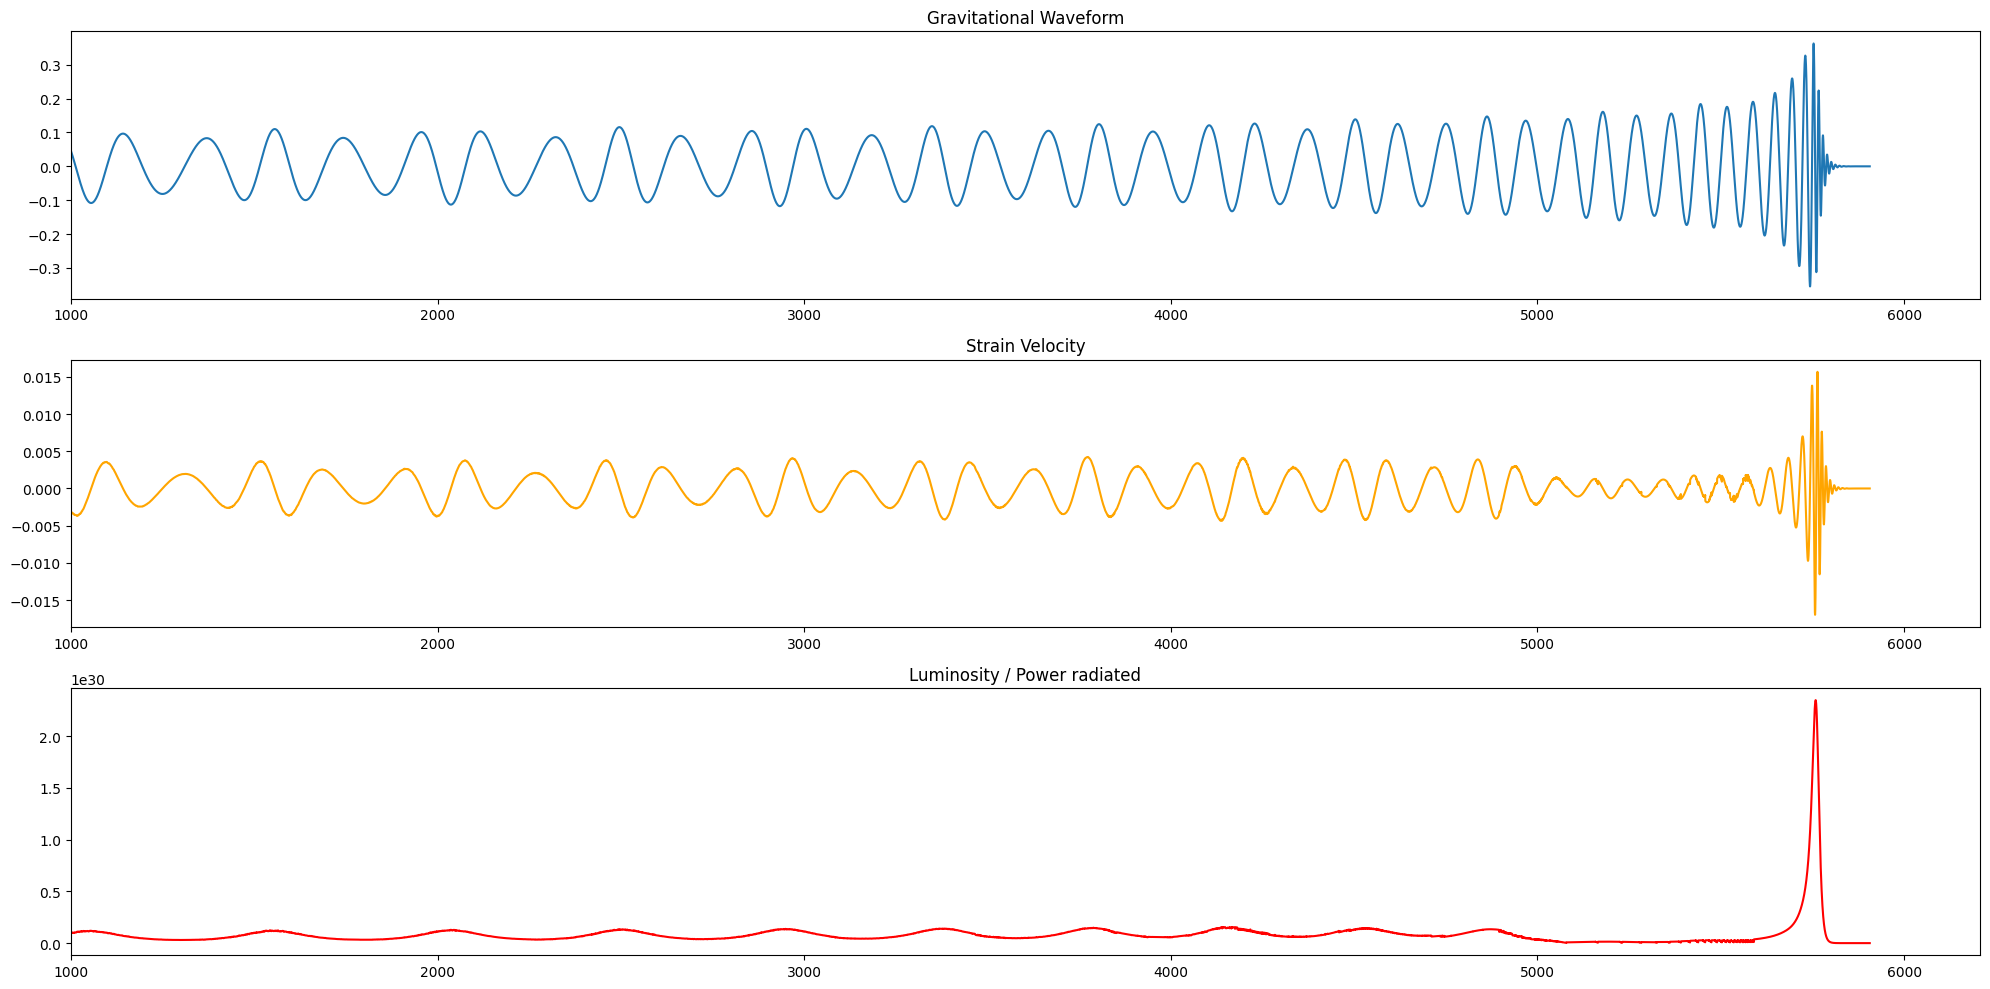

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(3,1,1)
plt.plot(arr_t, arr_hplus, label="h(t)")
plt.xlim(1000,)
plt.title("Gravitational Waveform")
plt.subplot(3,1,2)
plt.plot(arr_t, dhplus_dt, label="dh/dt", color='orange')
plt.xlim(1000,)
plt.title("Strain Velocity")
plt.subplot(3,1,3)
plt.plot(arr_t, L, label="Luminosity Proxy", color='red')
plt.xlim(1000,)
plt.ylim()
plt.title("Luminosity / Power radiated")
plt.tight_layout()
plt.show()


### 2. Using an approximant

In [38]:
from pycbc.waveform import get_td_waveform


In [19]:
hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                                     mass1=1000,
                                     mass2=10,
                                     spin1z=1,
                                     spin2z=0,
                                     f_lower= 10,
                                     mode_array=[(2, 2)],
                                     delta_t=1.0/4096)


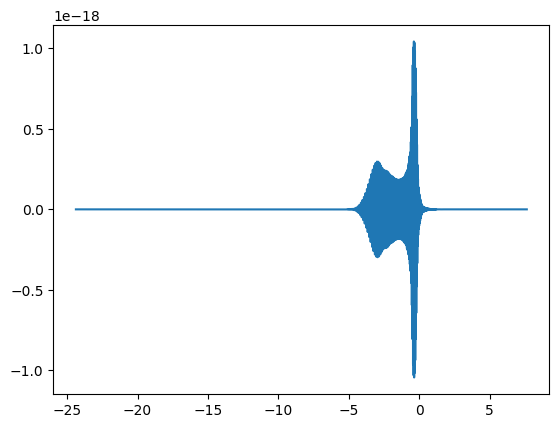

In [20]:
plt.plot(hp.sample_times,hp)

In [21]:
dt =1.0/4096

In [22]:
def hgrd(h):
    g = np.gradient(h)
    s = np.square(g) 
    return s,g

In [23]:
hps, ghp = hgrd(hp)

In [24]:
hcs, ghc = hgrd(hc)

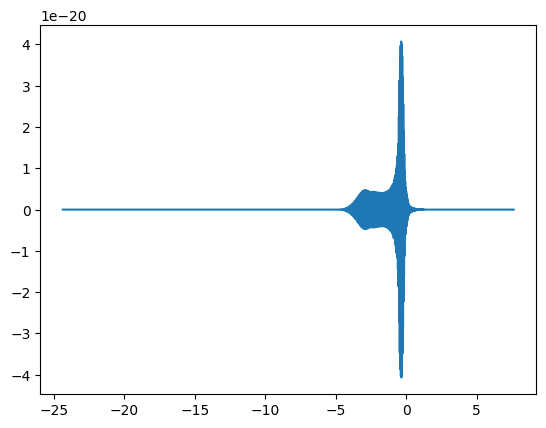

In [25]:
plt.plot(hp.sample_times,ghp)

In [26]:
tot = np.add(hps, hcs)

In [27]:
L = const * tot

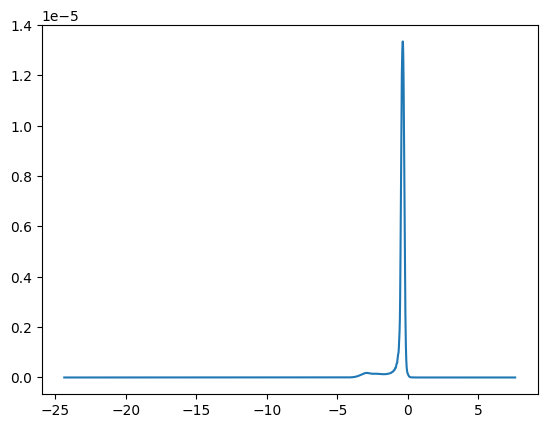

In [28]:
plt.plot(hp.sample_times,L)

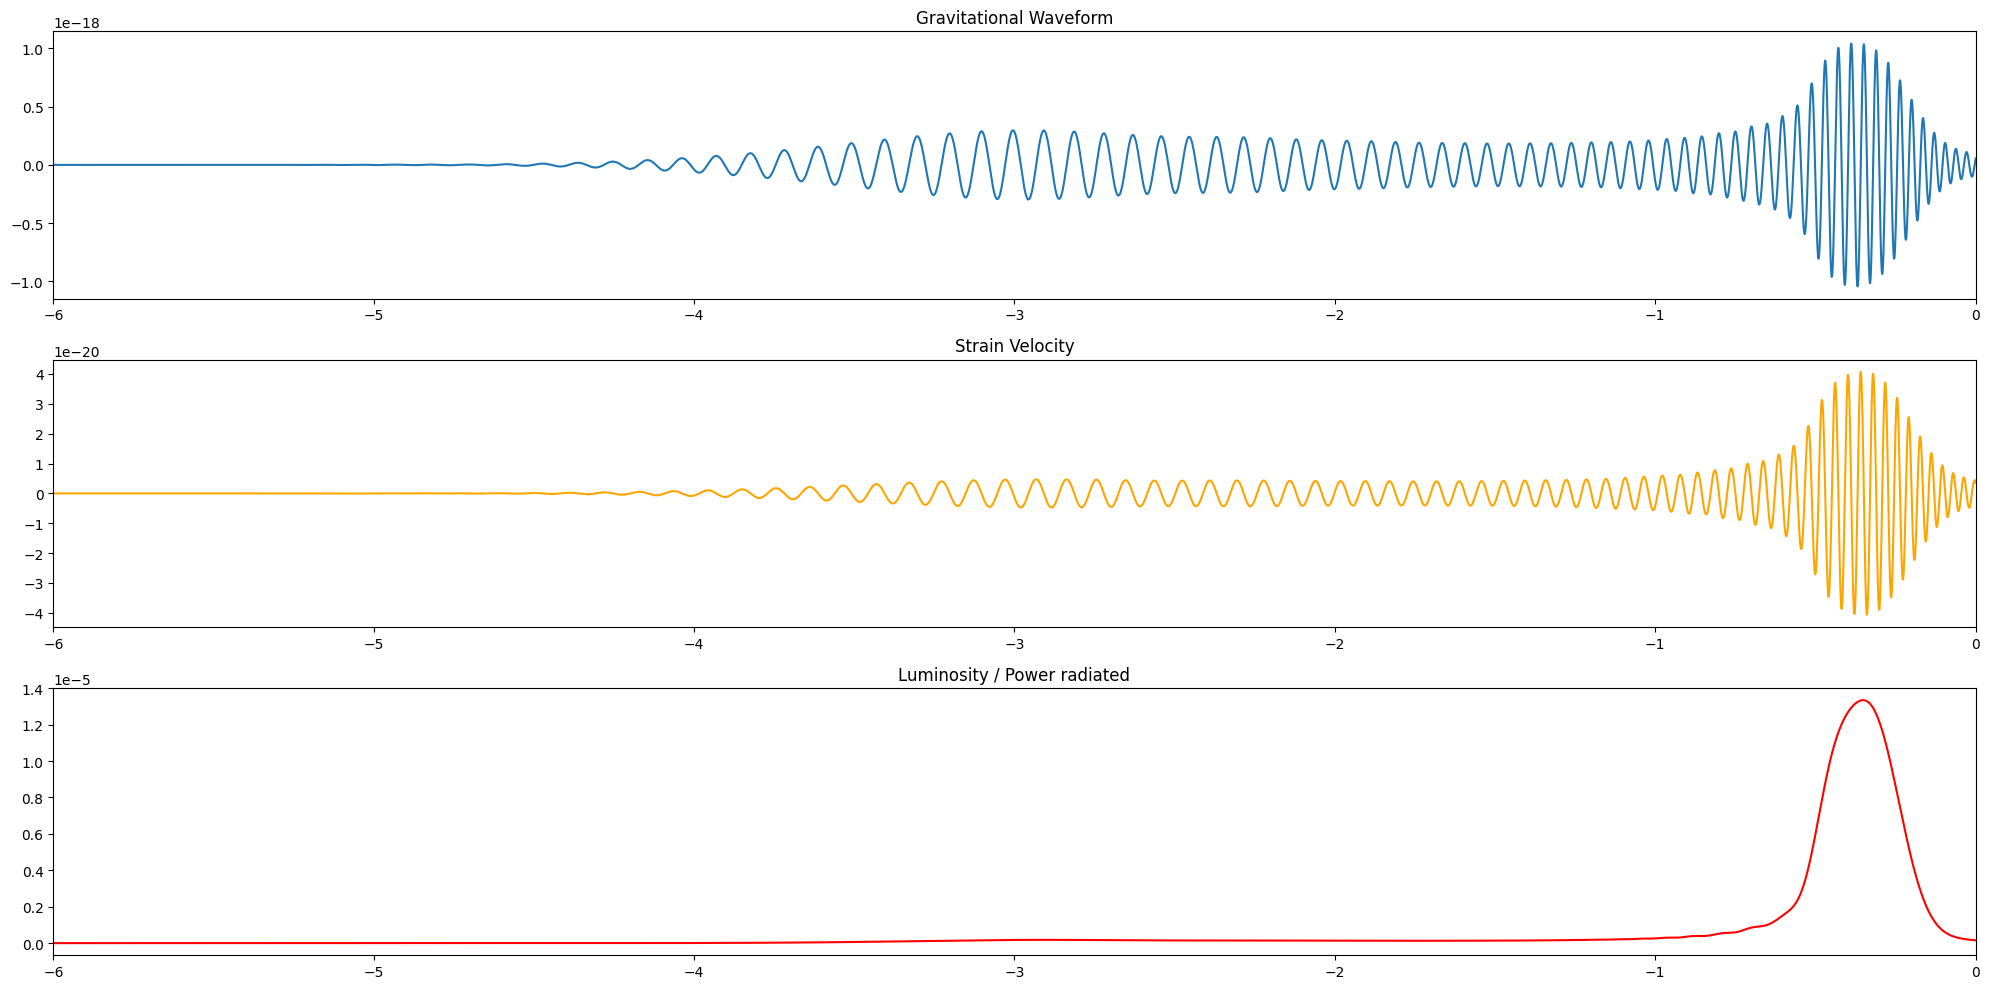

In [33]:
plt.figure(figsize=(20, 10))
plt.subplot(3,1,1)
plt.plot(hp.sample_times, hp, label="h(t)")
plt.xlim(-6,0)
plt.title("Gravitational Waveform")
plt.subplot(3,1,2)
plt.plot(hp.sample_times, ghp, label="dh/dt", color='orange')
plt.xlim(-6,0)
#plt.xlim(1000,)
plt.title("Strain Velocity")
plt.subplot(3,1,3)
plt.plot(hp.sample_times, L, label="Luminosity Proxy", color='red')
plt.xlim(-6,0)
#plt.xlim(1000,)
plt.ylim()
plt.title("Luminosity / Power radiated")
plt.tight_layout()
plt.show()
